<a href="https://colab.research.google.com/github/tomaru5963/colab/blob/master/MNIST_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/sample - loss: 1.7056 - acc: 0.4657 - val_loss: 0.8640 - val_acc: 0.7733
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6279 - acc: 0.8378 - val_loss: 0.4688 - val_acc: 0.8795
Epoch 3/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4261 - acc: 0.8874 - val_loss: 0.3671 - val_acc: 0.9010
Epoch 4/20
60000/60000 [==============================] - 2s 31us/s

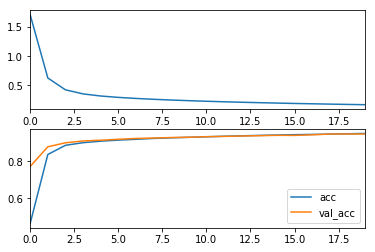

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.initializers import RandomNormal
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import SGD

BATCH_SIZE = 100
NUM_EPOCHS = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(784,),
                kernel_initializer=RandomNormal(stddev=0.01),
                bias_initializer='zeros'))
model.add(Dense(10, activation='softmax',
                kernel_initializer=RandomNormal(stddev=0.01),
                bias_initializer='zeros'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))


# history.history
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
pd.Series(history.history['loss']).plot(ax=ax1)
pd.DataFrame(zip(history.history['acc'], history.history['val_acc']),
             columns=('acc', 'val_acc')).plot(ax=ax2)
